In [1]:
import pandas as pd
import numpy as np

In [2]:
import re

In [3]:
import nltk



In [4]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


False

In [5]:
from sklearn.cluster import KMeans

In [6]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [7]:
def preprocess_text(text):
    # Remove HTML tags (if any)
    text = re.sub(r"<.*?>", "", text)
    
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation
    tokens = [token for token in tokens if token.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    # print(filtered_tokens)
    # # Lemmatization
    # lemmatizer = WordNetLemmatizer()
    # lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # # Join the tokens back into a single string
    # processed_text = " ".join(filtered_tokens)

    
    return filtered_tokens

In [36]:
# amazon=pd.read_csv("Eco_Friendly_Products_Test_Full.xlsx - Sheet1.csv")
amazon=pd.read_csv("Amazon Reviews Validation Data_1.csv")

In [37]:
amazon

,Reviews,Aspect
0,The settings are perfect for all hair types,Adaptability
1,with lots of settings,Adaptability
2,heating element has died,Durability
3,"Also, the diffuser does not stay on at all.",Ease of Use
4,and it won't stay on it at all. Just flys off....,Ease of Use
...,...,...
1176,top no longer stays on.,Performance
1177,unfortunately one of the lids does not fit at all,Performance
1178,"cheap enough that if my husband loses one, we ...",Price
1179,economical price,Price


In [38]:
# a=amazon["Review"]
a=amazon["Reviews"]


In [39]:
q=amazon["Aspect"]

In [40]:
all_values = q.str.split(',').explode()

In [41]:
unique_values = all_values.unique()

In [42]:
len_aspect=len(unique_values)

In [43]:
processed_series = a.apply(preprocess_text)

In [44]:
from gensim.models import Word2Vec

In [45]:
# Train Word2Vec model
model = Word2Vec(processed_series, vector_size=100, window=5, min_count=1)

# Get word embeddings
word_embeddings = model.wv

In [46]:
word_embeddings.index_to_key

['easy',
 'great',
 'well',
 'use',
 'good',
 'like',
 'quality',
 'durable',
 'work',
 'one',
 'really',
 'also',
 'price',
 'time',
 'clean',
 'nice',
 'get',
 'product',
 'easily',
 'sturdy',
 'comfortable',
 'works',
 'water',
 'fit',
 'wash',
 'enough',
 'even',
 'bags',
 'strong',
 'would',
 'makes',
 'light',
 'hot',
 'hold',
 'size',
 'keep',
 'colors',
 'heavy',
 'bag',
 'keeps',
 'color',
 'beautiful',
 'quickly',
 'made',
 'super',
 'little',
 'need',
 'fast',
 'iron',
 'paper',
 'still',
 'shower',
 'put',
 'bottle',
 'cold',
 'stay',
 'way',
 'excellent',
 'day',
 'love',
 'soft',
 'much',
 'looks',
 'thing',
 'months',
 'perfect',
 'broke',
 'long',
 'perfectly',
 'seems',
 'used',
 'carry',
 'handle',
 'pretty',
 'getting',
 'temperature',
 'weight',
 'fits',
 'fan',
 'tea',
 'set',
 'first',
 'clock',
 'smell',
 'quite',
 'two',
 'absorbent',
 'difficult',
 'working',
 'hand',
 'far',
 'strap',
 'never',
 'ever',
 'battery',
 'wish',
 'find',
 'coffee',
 'keyboard',
 't

In [47]:
# Obtain word vectors
word_vectors = [word_embeddings[word] for word in word_embeddings.index_to_key]

In [48]:
# adf=word_vectors.toDataFrame()

# convert the data to a pandas dataframe

df = pd.DataFrame(word_vectors)


In [49]:
df.to_csv("word2vec.csv")

In [20]:
!pip3 install scikit-fuzzy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [21]:
!pip3 install scikit-learn scikit-fuzzy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [22]:
vectors = np.array(word_vectors)

In [23]:
vectors

array([[-0.00338325,  0.00506123,  0.00569771, ..., -0.01279174,
         0.00315577,  0.0034055 ],
       [-0.01109785,  0.00746014,  0.00567662, ..., -0.00644985,
        -0.00778874,  0.0022975 ],
       [-0.00214791,  0.00704122, -0.00621562, ..., -0.00407835,
         0.01078371, -0.01000664],
       ...,
       [-0.0007857 ,  0.00152746, -0.00761227, ...,  0.0021972 ,
        -0.0081129 ,  0.00540206],
       [-0.00145601, -0.00506227,  0.00199696, ..., -0.00339867,
        -0.00457594,  0.00736071],
       [ 0.00421812, -0.00511134,  0.00960189, ...,  0.00255038,
         0.00334898,  0.00128478]], dtype=float32)

In [155]:
import skfuzzy as fuzz
import numpy as np

# Step 3: Apply Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    vectors.T,  # transpose data because cmeans assumes each column is a data point
    c=len_aspect,  # number of clusters
    m=2,  # fuzziness parameter
    error=0.005,
    maxiter=1000
)

# Assigning clusters based on maximum membership principle
cluster_membership = np.argmax(u, axis=0)
print("Cluster Membership:", cluster_membership)




Cluster Membership: [16 17  3 ... 23  9 11]


In [156]:
len(cluster_membership)

2176

In [157]:
# Apply K-means clustering
num_clusters = 25  # Number of aspects/topics
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(word_vectors)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=25)

In [158]:
# Get cluster labels
labels = kmeans.labels_

In [159]:
# Assign aspects to words based on cluster labels
word_aspects = {word: label for word, label in zip(word_embeddings.index_to_key, labels)}

In [160]:
# Print word aspects
dict_aspects = {}
for word, aspect in word_aspects.items():
    print(f"Word: {word}")
    print(f"Aspect: {aspect}")
    print()
    dict_aspects[word] = aspect

Word: great
Aspect: 11

Word: easy
Aspect: 24

Word: use
Aspect: 11

Word: well
Aspect: 11

Word: like
Aspect: 11

Word: good
Aspect: 11

Word: one
Aspect: 11

Word: really
Aspect: 11

Word: water
Aspect: 11

Word: durable
Aspect: 21

Word: product
Aspect: 11

Word: time
Aspect: 11

Word: quality
Aspect: 20

Word: work
Aspect: 5

Word: clean
Aspect: 20

Word: price
Aspect: 16

Word: would
Aspect: 11

Word: get
Aspect: 11

Word: also
Aspect: 11

Word: comfortable
Aspect: 10

Word: love
Aspect: 11

Word: nice
Aspect: 6

Word: easily
Aspect: 24

Word: bags
Aspect: 24

Word: wash
Aspect: 11

Word: fit
Aspect: 11

Word: little
Aspect: 11

Word: enough
Aspect: 11

Word: works
Aspect: 11

Word: long
Aspect: 11

Word: paper
Aspect: 11

Word: made
Aspect: 11

Word: sturdy
Aspect: 11

Word: keep
Aspect: 19

Word: still
Aspect: 11

Word: hold
Aspect: 11

Word: strong
Aspect: 4

Word: even
Aspect: 11

Word: used
Aspect: 6

Word: hot
Aspect: 16

Word: way
Aspect: 24

Word: bottle
Aspect: 11

Word: 

In [161]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

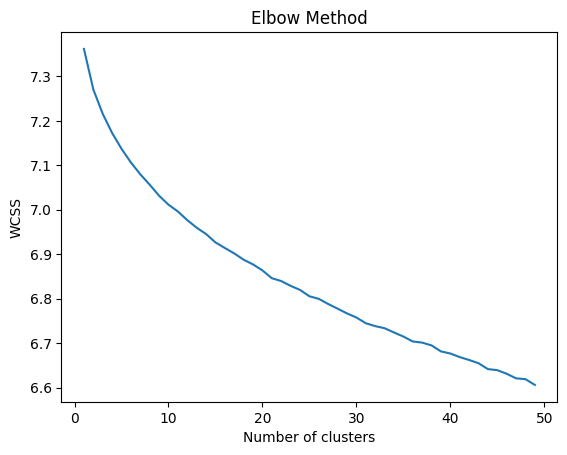

In [162]:
wcss=[]
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(word_vectors)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range(1, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.preprocessing import normalize

In [163]:
word_vectors = normalize(word_vectors)

In [164]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



/var/folders/p1/6w1txg1s1rj5tv4tp55vh74r0000gn/T/ipykernel_19193/2241626377.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mplcursors/_pick_info.py:55: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  paths = scatter.__wrapped__(*args, **kwargs)


IndexError: index 2176 is out of bounds for axis 0 with size 2176

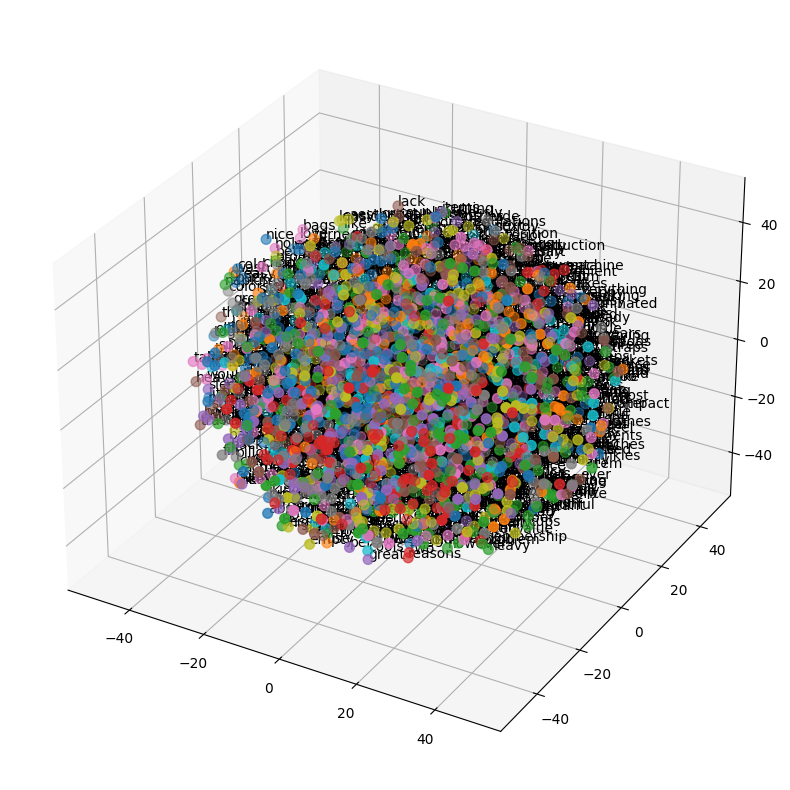

In [165]:
from mpl_toolkits.mplot3d import Axes3D

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=3, random_state=0)
word_vectors_3d = tsne.fit_transform(word_vectors)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Get a colormap
colormap = plt.cm.get_cmap('tab10')

# Scatter plot for each cluster
for i, label in enumerate(np.unique(labels)):
    cluster_points = word_vectors_3d[labels == label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], 
               c=colormap(i / len(np.unique(labels))), label=f'Cluster {label+1}', s=50)

# Annotate points with the corresponding words
words = [word for sentence in processed_series for word in sentence]
for i, word in enumerate(words):
    ax.text(word_vectors_3d[i, 0], word_vectors_3d[i, 1], word_vectors_3d[i, 2], word)

# Add labels and title
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
plt.title('Word Clusters in 3D')
plt.legend()

# Show the plot
plt.show()


In [166]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(word_vectors)
new_values = PCA_model.transform(word_vectors)

In [167]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (2176, 2)
[[ 0.60554992 -0.04812733]
 [ 0.32871043 -0.27989489]
 [ 0.53394094  0.00289942]
 ...
 [-0.04789987 -0.11134962]
 [ 0.0847022  -0.04081822]
 [-0.16533927  0.06763563]]


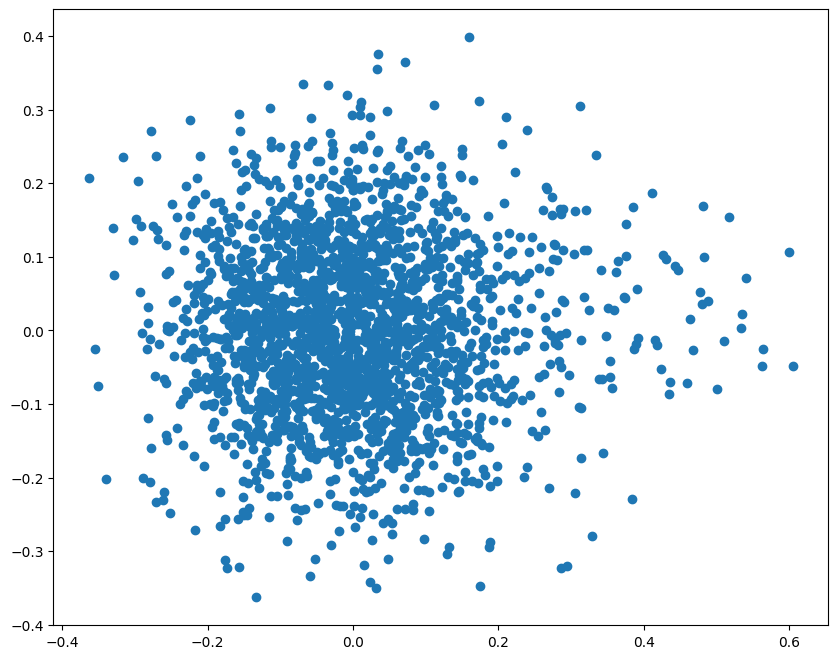

In [168]:
import matplotlib.pyplot as plt
import mplcursors

# Assuming 'new_values' is an array-like structure with two columns representing x and y coordinates
# and 'input_text_lst_news' is a list of labels for each point

x = new_values[:, 0]
y = new_values[:, 1]
labels = processed_series

plt.figure(figsize=(10, 8))
scatter = plt.scatter(x, y)

# Using mplcursors to show the label when a point is clicked or hovered over
mplcursors.cursor(scatter, hover=True).connect("add", lambda sel: sel.annotation.set_text(labels[sel.index]))

plt.show()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from sklearn.preprocessing import normalize
word_vectors = normalize(word_vectors)

# Initialize centroids
num_clusters = 25
centroids = word_vectors[np.random.choice(len(word_vectors), num_clusters, replace=False), :]

# K-means clustering using cosine similarity
for iteration in range(100):
    # Compute cosine similarity
    similarity = cosine_similarity(word_vectors, centroids)
    
    # Assign each point to the closest centroid
    labels = np.argmax(similarity, axis=1)
    
    # Update centroids
    for i in range(num_clusters):
        centroids[i] = np.mean(word_vectors[labels == i], axis=0)

# Print cluster assignments
# print("Cluster labels:", labels)


In [ ]:
print("Cluster labels:", labels)

Cluster labels: [11 24 24 ... 10 24  0]


IndexError: index 2176 is out of bounds for axis 0 with size 2176

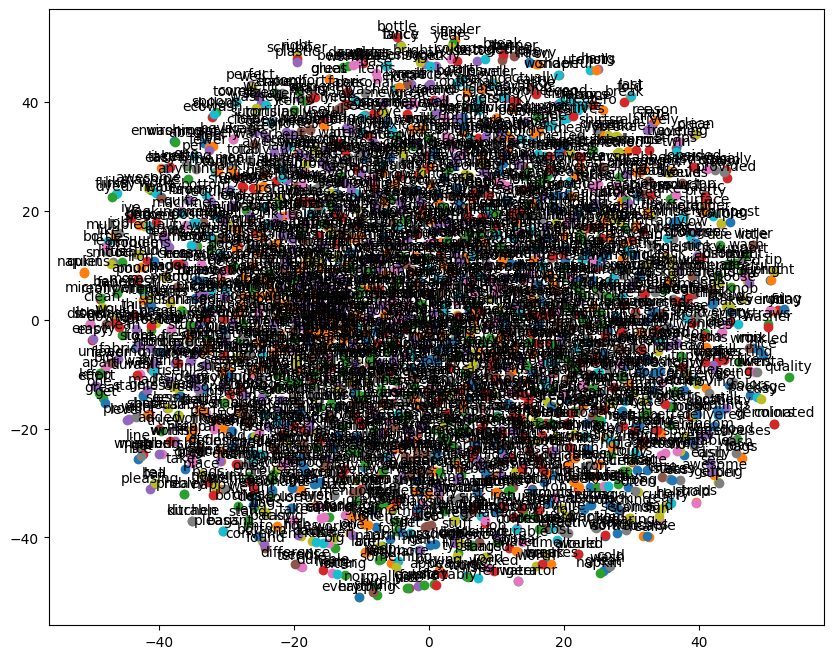

In [ ]:
word_vectors_2d = TSNE(n_components=2, random_state=0).fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(10, 8))
for i, label in enumerate(np.unique(labels)):
    plt.scatter(word_vectors_2d[labels == label, 0], word_vectors_2d[labels == label, 1], label=f'Cluster {i+1}')

# Annotate the points with their corresponding words
words = [word for sentence in processed_series for word in sentence]
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Word Clusters')
plt.legend()
plt.show()